In [ ]:
# Install packages
# After reviewing the questions, I decided to use networkx to find the triangles
# Big O notation will be commented each step

In [ ]:
pip install binance

In [ ]:
pip install requests

In [ ]:
pip install networkx

In [ ]:
pip install matplotlib

In [1]:
# Import packages
import binance
import requests
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Get all the symbols
symbols = list(binance.prices().keys()) #O(1)

In [3]:
symbols

['ETHBTC',
 'LTCBTC',
 'BNBBTC',
 'NEOBTC',
 'QTUMETH',
 'EOSETH',
 'SNTETH',
 'BNTETH',
 'BCCBTC',
 'GASBTC',
 'BNBETH',
 'BTCUSDT',
 'ETHUSDT',
 'HSRBTC',
 'OAXETH',
 'DNTETH',
 'MCOETH',
 'ICNETH',
 'MCOBTC',
 'WTCBTC',
 'WTCETH',
 'LRCBTC',
 'LRCETH',
 'QTUMBTC',
 'YOYOBTC',
 'OMGBTC',
 'OMGETH',
 'ZRXBTC',
 'ZRXETH',
 'STRATBTC',
 'STRATETH',
 'SNGLSBTC',
 'SNGLSETH',
 'BQXBTC',
 'BQXETH',
 'KNCBTC',
 'KNCETH',
 'FUNBTC',
 'FUNETH',
 'SNMBTC',
 'SNMETH',
 'NEOETH',
 'IOTABTC',
 'IOTAETH',
 'LINKBTC',
 'LINKETH',
 'XVGBTC',
 'XVGETH',
 'SALTBTC',
 'SALTETH',
 'MDABTC',
 'MDAETH',
 'MTLBTC',
 'MTLETH',
 'SUBBTC',
 'SUBETH',
 'EOSBTC',
 'SNTBTC',
 'ETCETH',
 'ETCBTC',
 'MTHBTC',
 'MTHETH',
 'ENGBTC',
 'ENGETH',
 'DNTBTC',
 'ZECBTC',
 'ZECETH',
 'BNTBTC',
 'ASTBTC',
 'ASTETH',
 'DASHBTC',
 'DASHETH',
 'OAXBTC',
 'ICNBTC',
 'BTGBTC',
 'BTGETH',
 'EVXBTC',
 'EVXETH',
 'REQBTC',
 'REQETH',
 'VIBBTC',
 'VIBETH',
 'HSRETH',
 'TRXBTC',
 'TRXETH',
 'POWRBTC',
 'POWRETH',
 'ARKBTC',
 'ARKETH'

In [4]:
# Number of symbols
len(symbols)

504

In [5]:
# I googled api binance and found https://github.com/binance-exchange/binance-official-api-docs/blob/master/rest-api.md 
# which under Exchange Info baseAsset and quoteAsset are properly seperated from the paired symbols

In [6]:
def get_binance(): #O(1)
    endpoint = 'https://api.binance.com/api/v1/exchangeInfo'
    resp = requests.get(endpoint)
    resp.raise_for_status()
    return resp.json()

In [7]:
pairs = [(x['baseAsset'], x['quoteAsset']) for x in get_binance()['symbols']] # O(n) in number of symbols

In [8]:
pairs

[('ETH', 'BTC'),
 ('LTC', 'BTC'),
 ('BNB', 'BTC'),
 ('NEO', 'BTC'),
 ('QTUM', 'ETH'),
 ('EOS', 'ETH'),
 ('SNT', 'ETH'),
 ('BNT', 'ETH'),
 ('BCC', 'BTC'),
 ('GAS', 'BTC'),
 ('BNB', 'ETH'),
 ('BTC', 'USDT'),
 ('ETH', 'USDT'),
 ('HSR', 'BTC'),
 ('OAX', 'ETH'),
 ('DNT', 'ETH'),
 ('MCO', 'ETH'),
 ('ICN', 'ETH'),
 ('MCO', 'BTC'),
 ('WTC', 'BTC'),
 ('WTC', 'ETH'),
 ('LRC', 'BTC'),
 ('LRC', 'ETH'),
 ('QTUM', 'BTC'),
 ('YOYO', 'BTC'),
 ('OMG', 'BTC'),
 ('OMG', 'ETH'),
 ('ZRX', 'BTC'),
 ('ZRX', 'ETH'),
 ('STRAT', 'BTC'),
 ('STRAT', 'ETH'),
 ('SNGLS', 'BTC'),
 ('SNGLS', 'ETH'),
 ('BQX', 'BTC'),
 ('BQX', 'ETH'),
 ('KNC', 'BTC'),
 ('KNC', 'ETH'),
 ('FUN', 'BTC'),
 ('FUN', 'ETH'),
 ('SNM', 'BTC'),
 ('SNM', 'ETH'),
 ('NEO', 'ETH'),
 ('IOTA', 'BTC'),
 ('IOTA', 'ETH'),
 ('LINK', 'BTC'),
 ('LINK', 'ETH'),
 ('XVG', 'BTC'),
 ('XVG', 'ETH'),
 ('SALT', 'BTC'),
 ('SALT', 'ETH'),
 ('MDA', 'BTC'),
 ('MDA', 'ETH'),
 ('MTL', 'BTC'),
 ('MTL', 'ETH'),
 ('SUB', 'BTC'),
 ('SUB', 'ETH'),
 ('EOS', 'BTC'),
 ('SNT', 'BT

In [9]:
# Check number of pairs, 504 is the same as in the list of symbols
len(pairs)

504

In [10]:
# Create a null graph and add in edges from list pairs
G = nx.DiGraph()
for source, sink in pairs: # O(n) in symbols
    G.add_edge(source, sink)

In [11]:
G

In [12]:
# Check
len(G.edges())

504

In [13]:
# Find all cycles
cycles = list(nx.simple_cycles(G)) # simple_cycles big O: O((146+symbols)(1+246)) = O(n)
# stackoverflow reference of calculating big O: 
#https://stackoverflow.com/questions/49332606/how-to-estimate-roughly-the-computation-time-while-using-module-networkx


In [14]:
# display all cycles
cycles

[['USDC', 'PAX', 'TUSD', 'BNB', 'USDS'],
 ['USDC', 'PAX', 'TUSD', 'BNB'],
 ['USDC', 'PAX', 'TUSD', 'BNB', 'ETH'],
 ['USDC', 'PAX', 'TUSD', 'BNB', 'ETH', 'BTC', 'USDS'],
 ['USDC', 'PAX', 'TUSD', 'BNB', 'ETH', 'BTC'],
 ['USDC', 'PAX', 'TUSD', 'BNB', 'BTC', 'USDS'],
 ['USDC', 'PAX', 'TUSD', 'BNB', 'BTC'],
 ['USDC', 'PAX', 'TUSD', 'ETH'],
 ['USDC', 'PAX', 'TUSD', 'ETH', 'BTC', 'USDS'],
 ['USDC', 'PAX', 'TUSD', 'ETH', 'BTC'],
 ['USDC', 'PAX', 'TUSD', 'BTC', 'USDS'],
 ['USDC', 'PAX', 'TUSD', 'BTC'],
 ['USDC', 'PAX', 'ETH'],
 ['USDC', 'PAX', 'ETH', 'TUSD', 'BNB', 'USDS'],
 ['USDC', 'PAX', 'ETH', 'TUSD', 'BNB'],
 ['USDC', 'PAX', 'ETH', 'TUSD', 'BNB', 'BTC', 'USDS'],
 ['USDC', 'PAX', 'ETH', 'TUSD', 'BNB', 'BTC'],
 ['USDC', 'PAX', 'ETH', 'TUSD', 'BTC', 'USDS'],
 ['USDC', 'PAX', 'ETH', 'TUSD', 'BTC'],
 ['USDC', 'PAX', 'ETH', 'BTC', 'USDS'],
 ['USDC', 'PAX', 'ETH', 'BTC', 'USDS', 'TUSD', 'BNB'],
 ['USDC', 'PAX', 'ETH', 'BTC'],
 ['USDC', 'PAX', 'ETH', 'BTC', 'TUSD', 'BNB', 'USDS'],
 ['USDC', 'PAX',

In [15]:
len(cycles)

246

In [16]:
# Get cycles with only 3 edges from all cycles
cycles3 = [c for c in cycles if len(c) == 3]

In [17]:
cycles3

[['USDC', 'PAX', 'ETH'],
 ['USDC', 'PAX', 'BNB'],
 ['USDC', 'PAX', 'BTC'],
 ['USDC', 'TUSD', 'BNB'],
 ['USDC', 'TUSD', 'ETH'],
 ['USDC', 'TUSD', 'BTC'],
 ['USDC', 'BTC', 'USDS'],
 ['USDC', 'BNB', 'USDS'],
 ['USDC', 'BNB', 'ETH'],
 ['USDC', 'BNB', 'BTC'],
 ['BTC', 'USDS', 'TUSD'],
 ['BTC', 'USDS', 'PAX'],
 ['BTC', 'PAX', 'TUSD'],
 ['BTC', 'PAX', 'ETH'],
 ['BTC', 'PAX', 'BNB'],
 ['BTC', 'TUSD', 'BNB'],
 ['BTC', 'TUSD', 'ETH'],
 ['TUSD', 'BNB', 'USDS'],
 ['TUSD', 'BNB', 'PAX'],
 ['TUSD', 'BNB', 'ETH'],
 ['TUSD', 'ETH', 'PAX'],
 ['BNB', 'USDS', 'PAX'],
 ['BNB', 'ETH', 'PAX']]

In [18]:
# Check
for a, b, c in cycles3: # O(n)
    assert f'{a}{b}' in symbols
    assert f'{b}{c}' in symbols
    assert f'{c}{a}' in symbols

In [19]:
print(f'{len(cycles3)} triangles computed in O(n)')

23 triangles computed in O(n)


In [25]:
# Graphic representation
# Retrieve pairs from cycles3
tri_pairs = []
for a,b,c in cycles3:  # O(n)
    tri_pairs.append([(a,b),(b,c),(c,a)])

In [26]:
# Flatten and remove duplicates from the list
tri_pairs = [ x for y in tri_pairs for x in y]
tri_pairs = set([tuple(x) for x in tri_pairs])

In [27]:
tri_pairs

{('BNB', 'BTC'),
 ('BNB', 'ETH'),
 ('BNB', 'PAX'),
 ('BNB', 'USDC'),
 ('BNB', 'USDS'),
 ('BTC', 'PAX'),
 ('BTC', 'TUSD'),
 ('BTC', 'USDC'),
 ('BTC', 'USDS'),
 ('ETH', 'BTC'),
 ('ETH', 'PAX'),
 ('ETH', 'TUSD'),
 ('ETH', 'USDC'),
 ('PAX', 'BNB'),
 ('PAX', 'BTC'),
 ('PAX', 'ETH'),
 ('PAX', 'TUSD'),
 ('TUSD', 'BNB'),
 ('TUSD', 'BTC'),
 ('TUSD', 'ETH'),
 ('USDC', 'BNB'),
 ('USDC', 'BTC'),
 ('USDC', 'PAX'),
 ('USDC', 'TUSD'),
 ('USDS', 'PAX'),
 ('USDS', 'TUSD'),
 ('USDS', 'USDC')}

In [28]:
G3 = nx.DiGraph()
for source, sink in tri_pairs: # O(n) in tri_pairs
    G3.add_edge(source, sink)

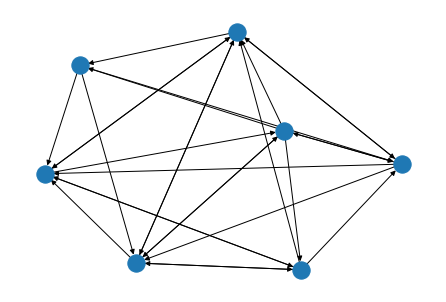

In [29]:
nx.draw(G3)